In [14]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import math
# reading csv files
data =  pd.read_csv('animals.dat', sep=",", header=None)
animals_name =  pd.read_csv('animalnames.txt', header=None)

data = data.to_numpy()
animals_name = animals_name.to_numpy()
animals_data = data.reshape(32,84)

animals_data
animals_name

array([["'antelop'\t"],
       ["'ape'\t"],
       ["'bat'\t"],
       ["'bear'\t"],
       ["'beetle'\t"],
       ["'butterfly'\t"],
       ["'camel'\t"],
       ["'cat'\t"],
       ["'crocodile'\t"],
       ["'dog'\t"],
       ["'dragonfly'\t"],
       ["'duck'\t"],
       ["'elephant'\t"],
       ["'frog'\t"],
       ["'giraffe'\t"],
       ["'grasshopper'\t"],
       ["'horse'"],
       ["'housefly'"],
       ["'hyena'\t"],
       ["'kangaroo'\t"],
       ["'lion'\t"],
       ["'moskito'\t"],
       ["'ostrich'\t"],
       ["'pelican'\t"],
       ["'penguin'\t"],
       ["'pig'\t"],
       ["'rabbit'\t"],
       ["'rat'\t"],
       ["'seaturtle'\t"],
       ["'skunk'\t"],
       ["'spider'\t"],
       ["'walrus'"]], dtype=object)

In [15]:
cities_csv = open("cities.dat")
cities = np.loadtxt(cities_csv, delimiter=",")
cities

array([[0.4   , 0.4439],
       [0.2439, 0.1463],
       [0.1707, 0.2293],
       [0.2293, 0.761 ],
       [0.5171, 0.9414],
       [0.8732, 0.6536],
       [0.6878, 0.5219],
       [0.8488, 0.3609],
       [0.6683, 0.2536],
       [0.6195, 0.2634]])

In [16]:
votes_csv = open("votes.dat")
names_csv = open("mpparty.dat")

votes = np.loadtxt(votes_csv, delimiter=",")
names = pd.read_csv('mpparty.dat', header=None)
genders = pd.read_csv('mpsex.dat', header=None)

names = names.to_numpy()
votes = votes.reshape(349, 31)
genders = genders.to_numpy()

In [17]:
def num_to_color(num):
  if num == 0 :
    return (1,1,1)
  if num == 1 :
    return (204,1,1)
  if num == 2 :
    return (204,1,204)  
  if num == 3 :
    return (204,204,1)   
  if num == 4 :
    return (102,204,1)
  if num == 5 :
    return (1,1,102)
  if num == 6 :
    return (200,104,1)
  if num == 7 :
    return (1,204,204)          


def sex_to_color(num):
  if num == 0 :
    return (1,1,200)
  if num == 1 :
    return (204,1,1)            

In [18]:
#Sorting functions
def takeFirst(elem):
    return elem[0]


def color_mix(color_list) :
  if not color_list :
    return [255,255,255]
  else :
    cell_population = 0
    for color in color_list :
      cell_population += color[1]


    first_color = color_list[0]
    mix = [first_color[0][0], first_color[0][1], first_color[0][2], first_color[0][1]/cell_population]
    mix_R = 1
    if len(color_list) > 1 :
      for i in range(1, len(color_list)) :
        second_color = color_list[i]  
        mix_R = 1 - (1 - mix[3]) * (1 - second_color[1]/cell_population)
        mix[0] = (mix[0] * mix[3] /mix_R)  + second_color[0][0] * (second_color[1]/cell_population) / mix_R
        mix[1] = (mix[1] * mix[3] /mix_R)  + second_color[0][1] * (second_color[1]/cell_population) / mix_R
        mix[2] = (mix[2] * mix[3] /mix_R)  + second_color[0][2] * (second_color[1]/cell_population) / mix_R

    return [first_color[0][0], first_color[0][1], first_color[0][2]] 

In [19]:
def stack(listi, o) :
  if not listi :
    listi.append([num_to_color(o), 1])
  else :  
    for element in listi :
      if element[0] == num_to_color(o) :
        element[1] = element[1] + 1  
        return 1
    print("o : ", o, "num(o)", num_to_color(o))    
    listi.append([num_to_color(o), 1])   

def stack_gender(listi, o) :
  if not listi :
    listi.append([sex_to_color(o), 1])
  else :  
    for element in listi :
      if element[0] == sex_to_color(o) :
        element[1] = element[1] + 1  
        return 1         
    listi.append([sex_to_color(o), 1])            

def distance(X, W_i):
  return (X - W_i).T @ (X - W_i)

def most_similar(X, W):
  min = 10000
  winner = []

  for i in range(0, W[0].size) :
      d = distance(X,W[i])
      if (d < min) :
        min = d
        winner = i

  return winner    


def most_similar_2D(X, W, size_x, size_y):
  min = 10000
  winner = []

  for i in range(0, size_x) :
    for j in range(0, size_y) :
      d = distance(X,W[i*size_x + j])
      if (d < min) :
        min = d
        winner = (i, j)

  return winner  


def find_neighbours_2D(i, j, radius, size_x=100, size_y=84):
  neighbourgs = [(i,j)]

  for x in range(-radius, radius+1):
    for y in range(-radius, radius+1):
      if ((i+x) < 0 or (i+x) >= size_x) :
        continue
      if ((j+y) < 0 or (j+y) >= size_y) :
        continue  
      neighbourgs.append((i+x,j+y)) 
  return neighbourgs

def find_neighbours_1D(i, radius, size_x=100):
  neighbourgs = [i]

  for x in range(-radius, radius):
      if ((i+x) < 0 or (i+x) >= size_x) :
        continue
      neighbourgs.append(i+x)

  return neighbourgs  

def find_neighbours_1D_c(i, radius, size_x=100):
  neighbourgs = []

  for x in range(-radius, radius):
      neighbourgs.append(i+x)

  return neighbourgs    

def update_weights(X, W, neighbourgs, eta):
  n_W = W.copy()
  for i in neighbourgs :
    n_W[i] = W[i] + eta*(X - W[i])
  return n_W

def update_weights_2D(X, W, neighbourgs, eta, size_x = 10):
  n_W = W.copy()
  for i , j in neighbourgs :
    index = i*size_x + j
    n_W[index] = W[index] + eta*(X - W[index])
  return n_W  

def output_result_n(Patterns,Names, W):
  results = []

  for index_a in range(0, Patterns.shape[0]) : 
    i_winner = most_similar(Patterns[index_a], W)
    results.append((i_winner, Names[index_a][0][0:-2]))

  print(results)
  results.sort(key=takeFirst)
  return results  


def output_result(Patterns, W):
  results = []

  for index_a in range(0, Patterns.shape[0]) : 
    i_winner = most_similar(Patterns[index_a], W)
    results.append((i_winner, Patterns[index_a]))

  results.sort(key=takeFirst)
  return results    


def output_result_2D(Patterns, W, Names, size_x, size_y):
  results = [[[] for j in range(0,10)] for i in range(0, 10)]
  for index_a in range(0, Patterns.shape[0]) : 
    i_winner, j_winner = most_similar_2D(Patterns[index_a], W, size_x, size_y)
    stack(results[i_winner][j_winner], Names[index_a][0])

  return results   


def output_result_2D_gender(Patterns, W, Names, size_x, size_y):
  results = [[[] for j in range(0,10)] for i in range(0, 10)]
  for index_a in range(0, Patterns.shape[0]) : 
    i_winner, j_winner = most_similar_2D(Patterns[index_a], W, size_x, size_y)
    stack_gender(results[i_winner][j_winner], Names[index_a][0])

  return results   

In [33]:
print(find_neighbours_2D(5,6,1,10,10))

[(5, 6), (4, 5), (4, 6), (4, 7), (5, 5), (5, 6), (5, 7), (6, 5), (6, 6), (6, 7)]


In [41]:
W = -10*np.random.random_sample((100, 84))

n_epochs = 20

for n in range(0, n_epochs):
  for i in range(0, animals_data.shape[0]):
    i_w = most_similar(animals_data[i], W)
    neighbours = find_neighbours_1D(i_w, 4)
    W = update_weights(animals_data[i], W, neighbours, 0.2)



,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,-1.692014,-9.680563,-6.974675,-1.556685,-2.356850,-7.795228,-0.477821,-8.734034,-7.827128,-6.024678,...,-0.697319,-6.631985,-3.335403,-6.843553,-8.460522,-9.876616,-4.536220,-1.196085,-6.109752,-4.625844
1,-7.409657,-5.199120,-3.057272,-5.305612,-0.661947,-1.182625,-6.293443,-2.410927,-4.612306,-4.849498,...,-3.301913,-4.171555,-6.206733,-1.859227,-5.044692,-4.490798,-7.887150,-7.844347,-8.252076,-7.125730
2,-7.253482,-5.217655,-9.676582,-9.822488,-7.102524,-2.254088,-0.706434,-2.739849,-7.224141,-1.535765,...,-0.253444,-0.542220,-7.842293,-4.636129,-1.302919,-1.231220,-7.726737,-2.648233,-5.721551,-6.491044
3,-9.601500,-8.496403,-2.434874,-7.111573,-1.751895,-8.299940,-7.662066,-0.286889,-2.855322,-4.846808,...,-2.794926,-9.399561,-8.648331,-3.107930,-0.068918,-7.929207,-8.979546,-1.129728,-0.994975,-5.469412
4,-7.860767,-4.398558,-4.033941,-7.047300,-5.339702,-6.960704,-0.406110,-6.429619,-9.998950,-9.413083,...,-7.676962,-1.984145,-6.919907,-0.306634,-1.982304,-2.291330,-4.274675,-9.136305,-7.880988,-2.477556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-5.594876,-9.531134,-0.473310,-8.035481,-2.699479,-9.450430,-3.728425,-3.255165,-8.635166,-6.751533,...,-1.235541,-7.190374,-4.521353,-1.982518,-8.451805,-5.229885,-0.851956,-8.074746,-8.634756,-9.317522
96,-2.710337,-9.383431,-2.160406,-3.315732,-2.259382,-8.710966,-7.725261,-9.753222,-8.922606,-3.615490,...,-2.043743,-6.202840,-7.582493,-4.494274,-5.265005,-5.823855,-8.006476,-5.459461,-6.348324,-2.013465
97,-5.996459,-0.901588,-0.529473,-0.538134,-8.929439,-8.617175,-3.315220,-2.047841,-4.434076,-7.178942,...,-8.071788,-1.947630,-4.963753,-8.420280,-6.261366,-0.906234,-5.690188,-6.924626,-8.210215,-1.834317
98,-9.976051,-4.475046,-9.566540,-2.168999,-4.924814,-3.683800,-5.263925,-4.728814,-0.490507,-6.849198,...,-9.752331,-2.868001,-0.011624,-8.042507,-0.323268,-8.296413,-7.520164,-6.695838,-4.845728,-0.430815


In [22]:
res = output_result_n(animals_data, animals_name, W)

res = np.array(res)
res.reshape(2,32)
res

[(44, "'antelop"), (36, "'ape"), (36, "'bat"), (39, "'bear"), (79, "'beetle"), (72, "'butterfly"), (48, "'camel"), (36, "'cat"), (55, "'crocodile"), (39, "'dog"), (77, "'dragonfly"), (60, "'duck"), (50, "'elephant"), (55, "'frog"), (48, "'giraffe"), (79, "'grasshopper"), (48, "'hors"), (70, "'housefl"), (42, "'hyena"), (44, "'kangaroo"), (36, "'lion"), (71, "'moskito"), (60, "'ostrich"), (60, "'pelican"), (60, "'penguin"), (48, "'pig"), (44, "'rabbit"), (43, "'rat"), (55, "'seaturtle"), (39, "'skunk"), (65, "'spider"), (53, "'walru")]


array([['36', "'ape"],
       ['36', "'bat"],
       ['36', "'cat"],
       ['36', "'lion"],
       ['39', "'bear"],
       ['39', "'dog"],
       ['39', "'skunk"],
       ['42', "'hyena"],
       ['43', "'rat"],
       ['44', "'antelop"],
       ['44', "'kangaroo"],
       ['44', "'rabbit"],
       ['48', "'camel"],
       ['48', "'giraffe"],
       ['48', "'hors"],
       ['48', "'pig"],
       ['50', "'elephant"],
       ['53', "'walru"],
       ['55', "'crocodile"],
       ['55', "'frog"],
       ['55', "'seaturtle"],
       ['60', "'duck"],
       ['60', "'ostrich"],
       ['60', "'pelican"],
       ['60', "'penguin"],
       ['65', "'spider"],
       ['70', "'housefl"],
       ['71', "'moskito"],
       ['72', "'butterfly"],
       ['77', "'dragonfly"],
       ['79', "'beetle"],
       ['79', "'grasshopper"]], dtype='<U12')

4.2: Cyclic Tour :

In [23]:
W = np.random.random_sample((10, 2))
n_epochs = 20

for n in range(0, n_epochs):
  for i in range(0, cities.shape[0]):
    i_w = most_similar(cities[i], W)
    penalty = math.floor(n/20) 

    neighbours = find_neighbours_1D_c(i_w, 4, 10)
    W = update_weights(cities[i], W, neighbours, 0.05)

In [24]:
res = output_result(cities, W)

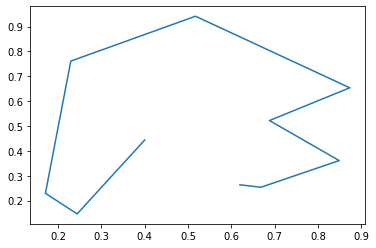

In [25]:
cities_res = []

for i in range(0,10) :
  cities_res.append(res[i][1])

cities_res = np.array(cities_res)
cities_res.reshape(10,2)

plt.plot(cities_res[:,0],cities_res[:,1], label ="accuracy")
plt.show()  

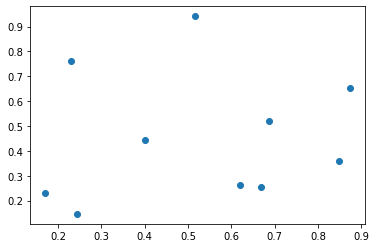

In [26]:
plt.scatter(cities_res[:,0],cities_res[:,1], label ="accuracy")
plt.show() 

Data Clustering: Votes of MPs

In [27]:
W = np.random.random_sample((100, 31))
n_epochs = 30

for n in range(0, n_epochs):
  for i in range(0, votes.shape[0]):
    i_w, j_w = most_similar_2D(votes[i], W, 10, 10)
    penalty = math.floor(n*4/20) 

    neighbours = find_neighbours_2D(i_w, j_w, 5 - penalty, 10, 10)
    W = update_weights_2D(votes[i], W, neighbours, 0.1)

In [28]:
res= output_result_2D(votes, W, names, 10, 10)


In [34]:
np.random.seed(19680801)
Z = [[[] for j in range(0,10)] for i in range(0, 10)]


for i in range(0,10):
  for j in range(0,10):
    Z[i][j] = color_mix(res[i][j])

TypeError: 'NoneType' object is not subscriptable

TypeError: Invalid shape (10, 10, 0) for image data

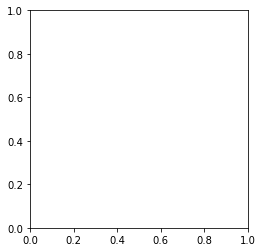

In [35]:
plt.imshow(Z, interpolation='nearest')
plt.show()

TypeError: unhashable type: 'numpy.ndarray'

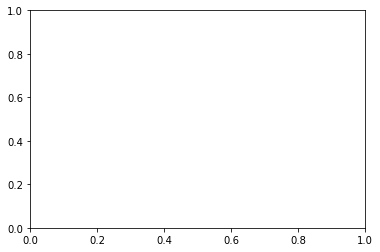

In [36]:
fig, ax = plt.subplots()

count = [names[0], names[1], names[2], names[3], names[4], names[5], names[6], names[7]]
party_n = [0, 1, 2, 3, 4, 5, 6, 7]

party = {'No party', 'Moderate', 'Liberal', 'Social Democrats', 'Vanspartiet', 'Ecology', 'Christian Democracy', 'Center'}
colors = [(0,0,0),(204/255,1/255,1/255),(204/255,1/255,204/255),(204/255,204/255,1/255),(102/255,204/255,1/255),(1/255,1/255,102/255),(200/255,104/255,1/255),(1/255,204/255,204/255)]


axis = ax.bar(party_n, count, label=party, color=colors)

ax.set_ylabel('fruit supply')
ax.set_title('Party disctribution')
plt.legend(iter(axis), party)

plt.show()

In [37]:
res= output_result_2D_gender(votes, W, genders, 10, 10)

In [38]:
Z = [[[] for j in range(0,10)] for i in range(0, 10)]


for i in range(0,10):
  for j in range(0,10):
    Z[i][j] = color_mix(res[i][j])


TypeError: 'NoneType' object is not subscriptable

TypeError: Invalid shape (10, 10, 0) for image data

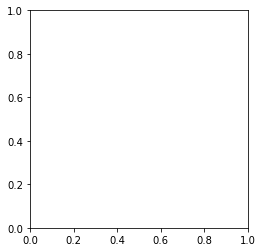

In [39]:
plt.imshow(Z, interpolation='nearest')
plt.show()